# Setup

Install previous version of pytorch due to compatibility issues with fastai

In [0]:
!pip install "torch==1.4" "torchvision==0.5.0"

Import required packages

In [0]:
import sklearn
import pandas as pd
import numpy as np
import csv
import os
import fastai
from fastai import *
from fastai.text import * 
from functools import partial

# Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials
from google.colab import drive

Authenticate to Google Drive to access dataset folder:

In [0]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


General parameters and settings

In [0]:
dataset_path = "/content/drive/My Drive/document-classification/datasets/rvl-cdip/mini-dataset-1488-288-192"
models_folder_path = "/content/drive/My Drive/document-classification/models/final-models"
model_name = "text-class_1488-288-192_valid-acc-59.38"

path_train = os.path.join(dataset_path, 'train_extracted.csv')
path_test = os.path.join(dataset_path, 'test_extracted.csv')
path_valid = os.path.join(dataset_path, 'valid_extracted.csv')

# Number of images classes
n_classes = 16
# Batch size to be used in training
batch_size = 32

# Dataset loading

Read the csv files containing the textual training and test set.

In [0]:
df_trn, df_test = pd.read_csv(path_train,names=['text','label']), pd.read_csv(path_test,names=['text','label'])
print(df_trn.shape, df_test.shape)

(1488, 2) (192, 2)


Create the DataBunch objects for the language model and the classifiers using the dataframes loaded in the previous cell.

fast.ai evaluates the performance on the validation set only, so we need to replace it inside the DataBunch with the test set.

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_test, path = "",
                                  text_cols="text", label_cols="label")
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_test,
                                      text_cols="text", label_cols="label", vocab=data_lm.train_ds.vocab, bs=batch_size)

# Model loading

In [0]:
learn = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.7, model_dir=models_folder_path)
learn.load(model_name)

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1488 items)
x: TextList
xxbos the tobacco institute ca xxunk wame 08 xxunk name xxunk oars enter wa tate l xxunk ere xxunk i street . xxunk washington . bc xxunk pay date xxunk . fa xxunk gad li xxwrep 5 ee xxunk xxunk to the ap xxunk xxunk times order of pl rok xxunk pron tk al xxunk non xxunk xo xxunk xxunk po 200 25 hosk xxrep 4 o ion xxunk xxunk 26 xxunk xxunk,xxbos xxunk eo hea xxunk xxunk xxunk xxunk xxunk xxunk form xxunk 7 xxunk soe xxunk 6 20 no,xxbos the anatomical record 210 115 123 1984 chronic infusion opiate peptides rat cerebrospinal fluid with osmotic minipumps lc . saland e. xxunk anv a. xxunk department anatomy the university new mexico school medicine albuquerque nm xxunk abstract beta endorphin related opiate peptides opiate xxunk xxunk naloxone chronically infused periods 24 48 hours lateral cerebral ventricle adult male rats using alza osmotic minipumps . previous studies suggested chemotactic like effect opiat

# Performance calculation

Accuracy:

In [0]:
learn.validate()

[1.2528445, tensor(0.6094)]

Confusion matrix:

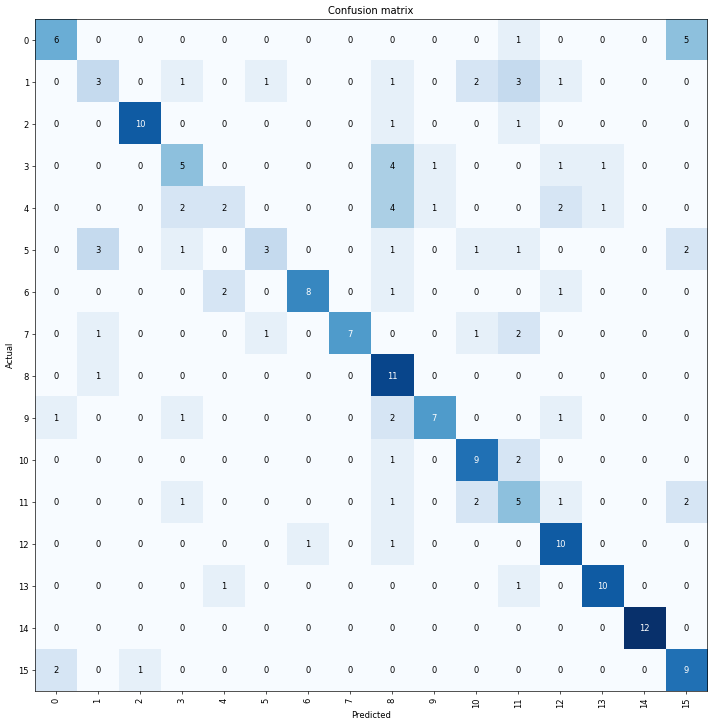

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

Most confused categories:

In [0]:
interp.most_confused(min_val=3)

[(0, 15, 5), (3, 8, 4), (4, 8, 4), (1, 11, 3), (5, 1, 3)]